# Montreal Crime Data Analysis

### Step 1: Install + Import Necessary Libraries

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Reading + Exploring Data

In [2]:
data = pd.read_csv('mtl-crime-data.csv')

In [3]:
data.head()

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     136642 non-null  int64  
 1   category       136642 non-null  object 
 2   date           136642 non-null  object 
 3   postal_code    136642 non-null  object 
 4   city           136642 non-null  object 
 5   neighbourhood  136642 non-null  object 
 6   year           136642 non-null  int64  
 7   count          136642 non-null  int64  
 8   longitude      136642 non-null  float64
 9   latitude       136642 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 10.4+ MB


### Step 3: Cleaning + Preprocessing

In [5]:
data.columns

Index(['Unnamed: 0', 'category', 'date', 'postal_code', 'city',
       'neighbourhood', 'year', 'count', 'longitude', 'latitude'],
      dtype='object')

#### Step 3.1: Removing unwanted columns

We will drop the "Unnamed" column as it is just used for indexing purposes, and doesn't include any values.

In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
data.columns

Index(['category', 'date', 'postal_code', 'city', 'neighbourhood', 'year',
       'count', 'longitude', 'latitude'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       136642 non-null  object 
 1   date           136642 non-null  object 
 2   postal_code    136642 non-null  object 
 3   city           136642 non-null  object 
 4   neighbourhood  136642 non-null  object 
 5   year           136642 non-null  int64  
 6   count          136642 non-null  int64  
 7   longitude      136642 non-null  float64
 8   latitude       136642 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 9.4+ MB


#### Step 3.2: Converting datatypes to required format

"Date" column is currently in string format, and we need it to be in datetime format in order to perform analysis.

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
category,object
date,datetime64[ns]
postal_code,object
city,object
neighbourhood,object
year,int64
count,int64
longitude,float64
latitude,float64


#### Step 3.3: Checking for null values

In [11]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
category,0
date,0
postal_code,0
city,0
neighbourhood,0
year,0
count,0
longitude,0
latitude,0


Dataset doesn't include null values.

### Step 4: Data Analysis + Visualization

Question 1: Which neighbourhoods have the highest number of reported crimes?

In [12]:
top_neighbourhood = pd.DataFrame(data['neighbourhood'].value_counts()).rename({"neighbourhood":"Case Reported"}, axis = 1).rename_axis("Neighbourhood").head(10)

top_neighbourhood.style.bar()

,count
Neighbourhood,
Plateau Mont-Royal,10844
Centre-Sud,7849
Downtown Montreal,7565
Mercier,7302
Montréal-Nord,6913
Rosemont,5907
Ahuntsic,5575
Petite-Patrie,5327
Saint-Laurent,5094


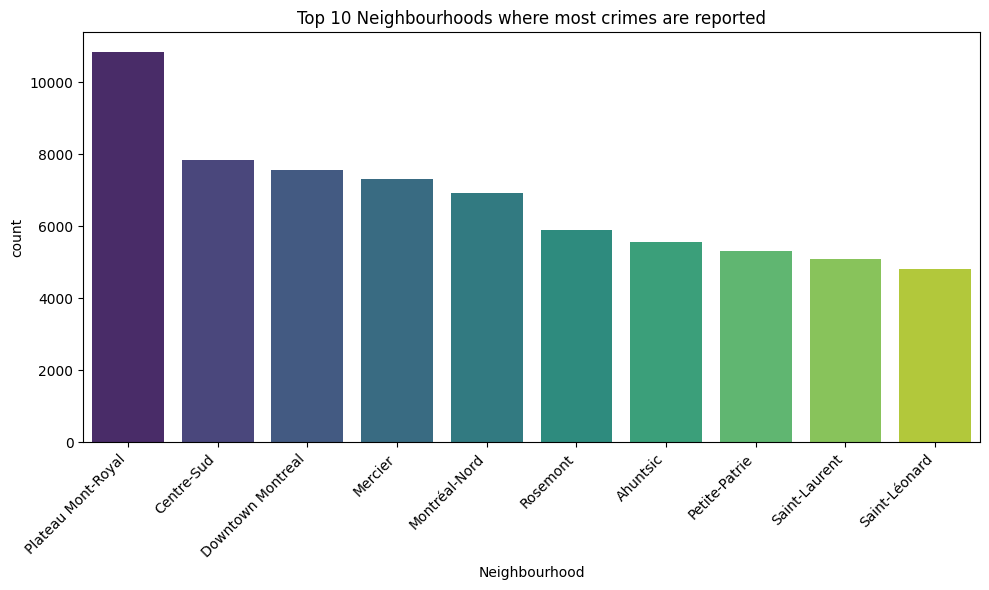

In [15]:
top_neighbourhood = top_neighbourhood.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhood, x=top_neighbourhood.index, y='count', palette='viridis')

plt.xlabel('Neighbourhood')
plt.ylabel('count')
plt.title('Top 10 Neighbourhoods where most crimes are reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Analysis shows that the neighbourhoods with the highest number of reported crimes in Montreal between 2015 - 2021 are:

1. Plateau Mont-Royal (total of 10844 reported crimes)
2. Centre-Sud (total of 7849 reported crimes)
3. Downtown Montreal (total of 7565 reported crimes)
4. Mercier (total of 7302 reported crimes)
5. Montréal-Nord (total of 6913 reported crimes)
6. Rosemont (total of 5907 reported crimes)
7. Ahuntsic (total of 5575 reported crimes)
8. Petite-Patrie (total of 5327 reported crimes)
9. Saint-Laurent (total of 5094 reported crimes)
10. Saint-Léonard (total of 4822 reported crimes)


**Question 2: What are the most frequent crimes by neighbourhood?**

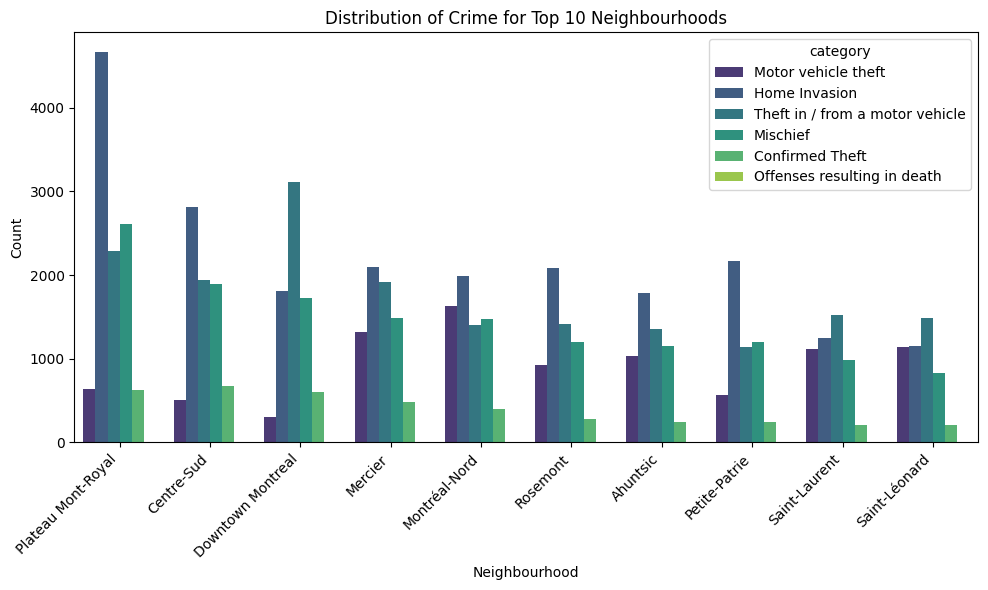

In [16]:
# Calculate the top 10 neighbourhoods with highest crime rate
top_neighbourhoods = data['neighbourhood'].value_counts().head(10).index

# Filter the data to include only the top 10 neighbourhoods
data_top_neighbourhoods = data[data['neighbourhood'].isin(top_neighbourhoods)]

# Get the order of neighborhoods by crime count in descending order
neighbourhood_order = data_top_neighbourhoods.groupby('neighbourhood')['category'].count().sort_values(ascending=False).index

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_neighbourhoods, x='neighbourhood', hue='category', palette='viridis', order=neighbourhood_order)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')

# Slightly rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

__Home Invasions__ are the most reported type of crime in all neighbourhoods, except in __Downtown, Saint-Laurent, and Saint Léonard;__ where __Theft In/From a Vehicle__ has a higher rate.

**Question 3: Number of reported crimes committed annualy in Montreal**

In [17]:
pd.DataFrame(data['year'].value_counts()).rename({"year":"Case Reported"}, axis = 1).rename_axis("Year")

,count
Year,
2015,24222
2016,23407
2017,22611
2018,19419
2019,18650
2020,17786
2021,10547


By default, the value_counts() method sorts values in descending order, so we can see that __2015 had the highest number of reported crimes (24,222 counts), while 2021 had the lowest number of reported crimes (10547).__

**Question 4: What are the general trends in the reported crimes between 2015-2021**

- What are the trends in the categories of reported crimes?
- Did crime rates increase or decrease?

**1. What are the trends in the categories of reported crimes?**

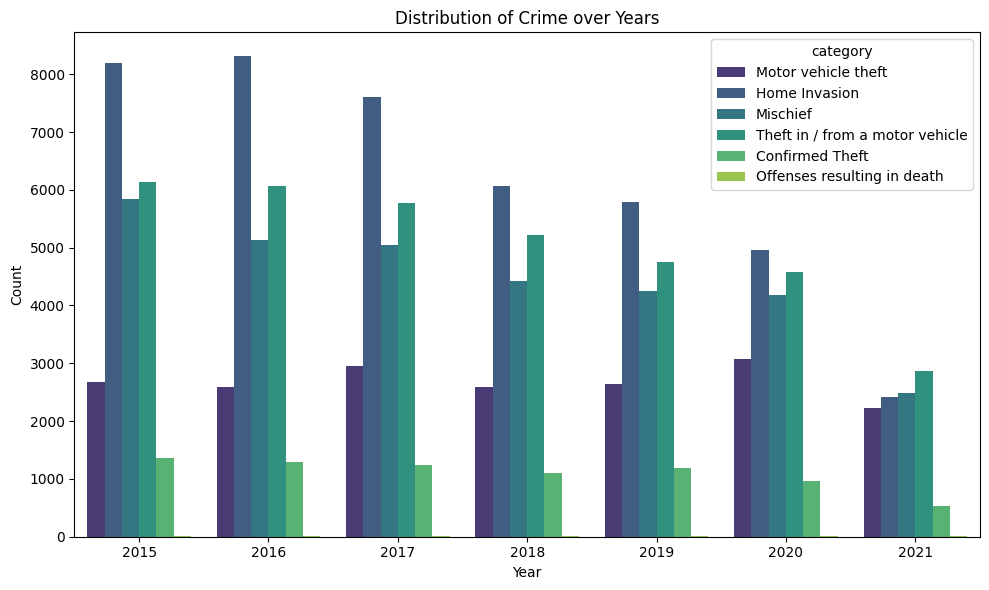

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year', hue='category', palette='viridis')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')

# Display the plot
plt.tight_layout()
plt.show()

__Home Invasions__ are the most reported crime from 2015-2020. In 2021 __Confirmed Theft__ was the most reported crime.

__Theft In/From a Motor Vehicle__ is the second most reported crime in Montreal from 20215-2021, followed by __Mischief__.

**2. Did crime rates increase or decrease?**

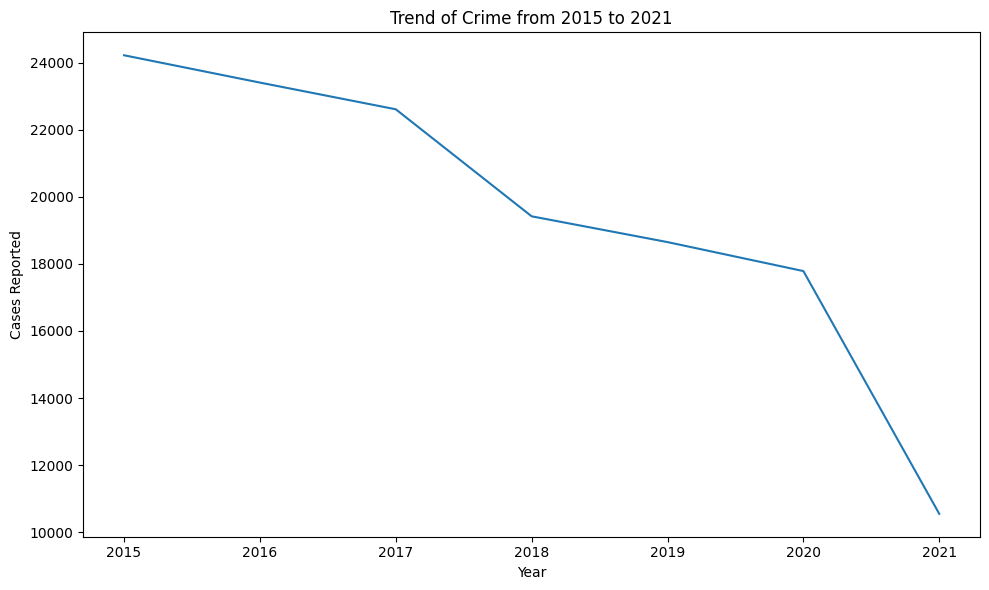

In [19]:
# Calculate the year-wise trend of crime rates
year_wise_trend = data.groupby('year').sum(numeric_only=True).drop(['longitude', 'latitude'], axis=1).rename({'count': 'Case Reported'}, axis=1)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_trend, x=year_wise_trend.index, y='Case Reported')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2015 to 2021')

# Display the plot
plt.tight_layout()
plt.show()

We can see that crime reports __decreased__ from 2015-2021.

**Question 5: On what days and months are a higher number of crimes reported?**

__Let's explore the types of crime committed depending on the day of the week.__

In [20]:
data['Month'] = data['date'].apply(lambda time: time.month)
data['Day of Week'] = data['date'].apply(lambda time: time.dayofweek)

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

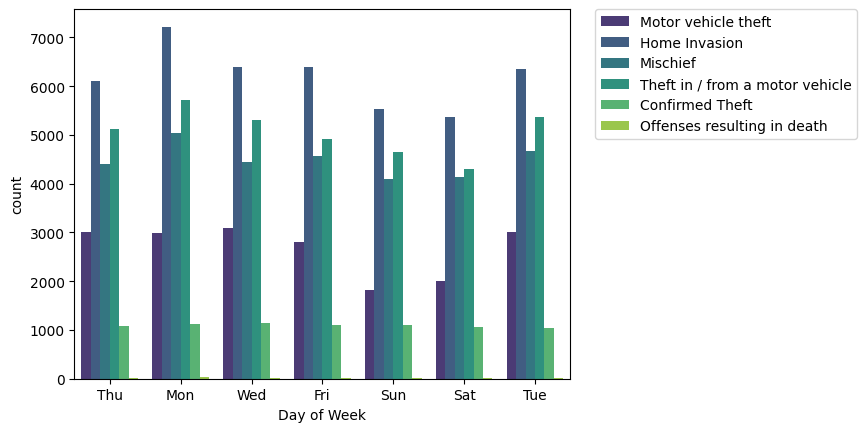

In [22]:
sns.countplot(x='Day of Week',data=data,hue='category',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that __Monday__ has the highest rate of *Home Invasions*.

__Saturday__ and __Sunday__ have the lowest number of *Motor Vehicle Thefts*.

__Let's explore the types of crime committed depending on the month of the year.__

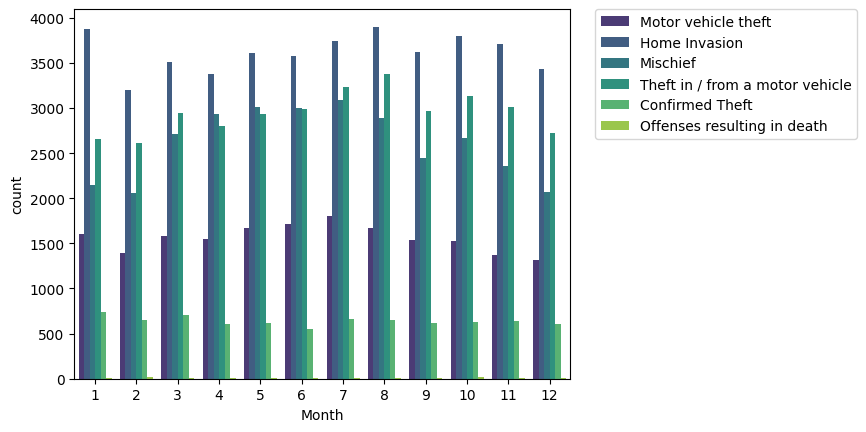

In [23]:
sns.countplot(x='Month', data=data, hue='category', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__January__ and __August__ have the highest numbers of _Home Invasions_.

__July__ and __August__ have the highest numbers of _Confirmed Thefts_.

__Let's explore the overall correlation between the time of year and the reported number of crimes between 2015-2021.__



Which days/months have the highest number of total reported crimes?

In [24]:
data.head()

,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude,Month,Day of Week
0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,9,Thu
1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,4,Mon
2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,1,Wed
3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,11,Mon
4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,8,Wed


In [25]:
#correlation between days/months

dayMonth = data.groupby(by=['Day of Week', 'Month']).count()['category'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1706,1519,1630,1692,1685,1694,1809,1685,1590,1698,1624,1460
Mon,1742,1636,1830,1803,1872,1931,2068,2150,1743,1879,1802,1647
Sat,1372,1275,1371,1417,1443,1428,1459,1456,1425,1506,1345,1394
Sun,1299,1265,1420,1428,1550,1394,1587,1578,1487,1450,1470,1285
Thu,1734,1403,1652,1679,1685,1674,1818,1861,1521,1666,1607,1466


<Axes: xlabel='Month', ylabel='Day of Week'>

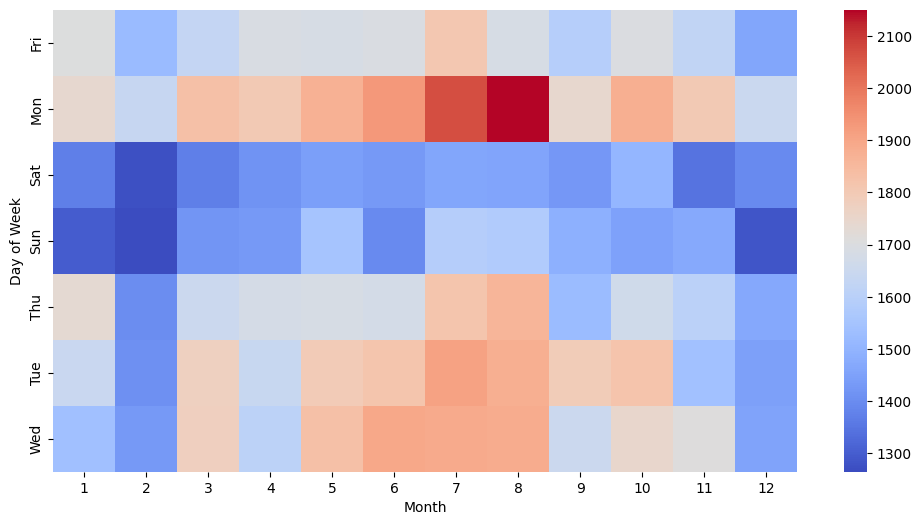

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

Overall, __Monday__ has the _highest_ number of reported crimes in the period between 2015-2021, followed by __Tuesday__ and __Wednesday__.

We can also see that __June, July__ and __August__ have _higher_ numbers of reported crimes.

__2015 - 2021 Crime Data Analysis Final Results__

- Neighborhood Insights:
  - Plateau
  - Centre-Sud
  - Downtown

***

- Crime Trends:
  - Mondays have the highest number of reported crimes, followed by Tuesday and Wednesday.
  - August is the month with the most number of reported crimes, followed by July and June.
  - Home invasions are the most reported crime, followed by theft in/from a motor vehicle and mischief.

***

- Yearly Statistics:
  - 2015 had the highest crime rate (24,222 cases), and 2021 the lowest (10,547 cases).
  - Overall, crime reports decreased every year from 2015 to 2021.
